In [3]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style("whitegrid")
from scipy.io import loadmat

# Part1 : Loading and visualizing the data

In [5]:
#Part 1 : Loading and visualizing the data
data = loadmat('ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [266]:
X,y,Xtest,ytest,Xval,yval = data['X'], data['y'], data['Xtest'], data['ytest'], data['Xval'], data['yval']
print(X.shape)
print(y.shape)
print(Xval.shape)
print(Xtest.shape)

(12, 1)
(12, 1)
(21, 1)
(21, 1)


In [267]:
y = y.reshape(y.shape[0])
ytest = ytest.reshape(ytest.shape[0])
yval = yval.reshape(yval.shape[0])

In [268]:
print(X.shape)
print(y.shape)
print(Xval.shape)
print(Xtest.shape)

(12, 1)
(12,)
(21, 1)
(21, 1)


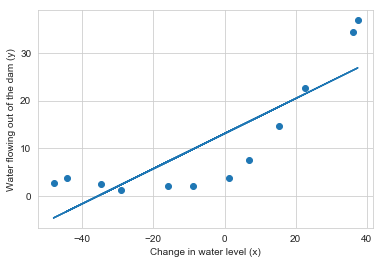

In [349]:
plt.scatter(X,y)
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
plt.plot(X,np.dot(X_bias,theta_opt))


In [270]:
m = len(X)
m

12

# Part 2+3 : Regularized linear regression cost and gradient

In [271]:
print(theta.shape)
X_bias = np.hstack((np.ones((m,1)),X))
print(X_bias.shape)
print(y.shape)
theta = np.ones((X_bias.shape[1]))
theta.shape

(2, 1)
(12, 2)
(12,)


(2,)

In [453]:
from scipy.special import expit


def linregcostfunc(init_theta,X,y,lam):
    
    #compute hypothesos
    hthetax = np.dot(X,init_theta)
    cost = np.sum((hthetax-y)**2)/(2*m)
    J_reg = cost + ((lam/(2*m))*np.sum(init_theta**2))
    
    grad_nonbias = np.sum(np.dot((hthetax-y),X[:,1:]),axis=0)/m + ((lam/m)*init_theta[1:])
    #print(type(grad_nonbias))
    grad_bias = [np.sum(np.dot((hthetax-y),X[:,0]),axis=0)/m]
    #return J_reg, grad_nonbias
    gradients = np.hstack((grad_bias,grad_nonbias))
    return (J_reg,gradients)
        

In [454]:
print(theta.shape) #(2,)
print(np.zeros((X_bias.shape[1])).shape) #(2,))
cost, gradients = linregcostfunc(theta,X_bias,y,1)
print(gradients)

(2,)
(2,)
[-15.30301567 598.25074417]


# Part 4 : Train Linear Regression

In [445]:
from scipy.optimize import minimize
def trainLinearReg(X,y,lam):
    initial_theta = np.zeros((X.shape[1]))
    res = minimize(linregcostfunc,initial_theta,args=(X,y,lam),jac=True,options={'maxiter':400,'disp':False})
    return res.x
    

In [455]:
theta_opt = trainLinearReg(X_bias,y,0.0)
theta_opt

array([13.08771416,  0.367742  ])

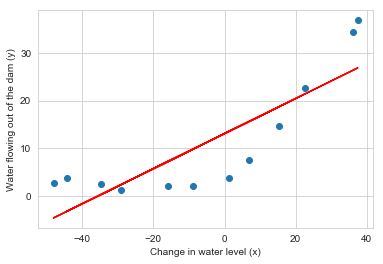

In [456]:
plt.scatter(X,y)
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
plt.plot(X,np.dot(X_bias,theta_opt),c='r')

# Part 5 : Learning curve for linear regression

In [384]:
def learningcurve(X,y,Xval,yval,lam):
    #return the train error vector and the cross-val error vector
    #error_train(i) will have the train error for first i examples 
    #error_val(i) will have the training error for the ith example
    
    #compute the errors for dataset 1 to m
    
    m_train = X.shape[0] #number of training examples
    mval = Xval.shape[0]
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))
    
    for i in range(1,m_train+1):
        opt_theta = trainLinearReg(X[0:i],y[0:i],lam)
        error_train[i-1] = (np.sum((np.dot(X[0:i],opt_theta)-y[0:i])**2))/(2*i)
        error_val[i-1] = (np.sum((np.dot(Xval,opt_theta)-yval)**2))/(2.0*mval)
    return error_train,error_val
        
    
    

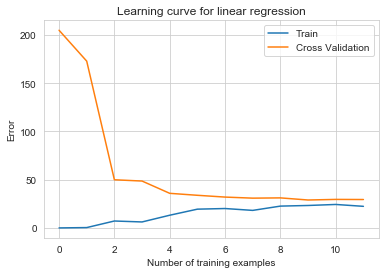

In [385]:
mval = Xval.shape[0]
Xval_bias = np.hstack((np.ones((mval,1)),Xval))

error_train, error_val = learningcurve(X_bias,y,Xval_bias,yval,lam)
plt.plot(range(len(X)), error_train, range(len(X)), error_val);
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()


# Part 6 : Feature mapping for polynomial regression

In [520]:
from sklearn.preprocessing import PolynomialFeatures
# def polyfeatures(X,p):
#     poly = PolynomialFeatures(degree)
#     X_poly = poly.fit_transform(X)
#     retXurn X_poly
def polyfeatures(X,p):
	X_poly = np.zeros((len(X),p))
	X = X.flatten()
	for i in range(1,p+1):
		X_poly[:,i-1] = X**i
	return X_poly

[-15.93675813 -29.15297922  36.18954863  37.49218733 -48.05882945
  -8.94145794  15.30779289 -34.70626581   1.38915437 -44.38375985
   7.01350208  22.76274892]


In [484]:
from sklearn import preprocessing
def featurenormalize(X):
    mu = np.mean(X, axis =0)
    sigma = np.std(X, axis = 0)
    normalized_X = preprocessing.scale(X)
    return mu, sigma, normalized_X

In [489]:
X_poly = polyfeatures(X,8)
mu,sigma, X_poly = featurenormalize(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))

X_poly_test = polyfeatures(Xtest,8)
X_poly_test = np.divide(X_poly_test-mu,sigma)
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0],1)),X_poly_test))

X_poly_val = polyfeatures(Xval,8)
X_poly_val = np.divide(X_poly_val-mu, sigma)
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0],1)),X_poly_val))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [490]:
X_poly.shape

(12, 9)

In [491]:
X_poly_test.shape

(21, 9)

In [492]:
X_poly_val.shape

(21, 9)

# Part 7 : Learning curve for polynomial regression

In [493]:
#Now we will try to run polynomial regression with multiple values of lambda
theta = trainLinearReg(X_poly,y,0)

In [500]:
def plotFit(min_x, max_x,mu,sigma,theta,p):
    x = np.arange(min_x-15,max_x+25,0.05).reshape(-1,1) #changes x into a row vector
    x_poly = polyfeatures(x,p)
    X_poly = np.divide(x_poly-mu, sigma)
    X_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))
    plt.plot(x,np.dot(X_poly,theta),linewidth=2)

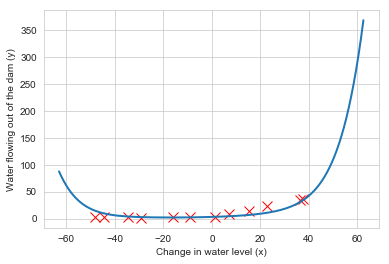

In [501]:
reg_param = 1.0
est_theta = trainLinearReg(X_poly,y,reg_param)
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plotFit(np.min(X), np.max(X), mu, sigma, est_theta, degree)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

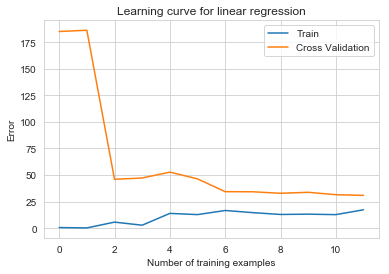

In [502]:
error_train, error_val = learningcurve(X_poly,y,X_poly_val,yval,reg_param)
plt.plot(range(len(X_poly)), error_train, range(len(X_poly)), error_val);
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()


# Part 8 : Validation Curve

In [514]:
def validationCurve(X, y, Xval, yval):
    #We will test different values of lambda
    lambda_vec = np.array([0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]).reshape((-1,1))
    error_train = np.zeros((lambda_vec.shape[0],1))
    error_val = np.zeros((lambda_vec.shape[0],1))
    m = len(X)
    mval = len(Xval)
    for i in range(len(lambda_vec)):
        reg_param = lambda_vec[i]
        est_theta = trainLinearReg(X,y,reg_param)
        error_train[i] = np.sum((np.dot(X,est_theta)-y)**2)/(2*m)
        error_val[i] = np.sum((np.dot(Xval,est_theta)-yval)**2)/(2*mval)
    return lambda_vec,error_train, error_val

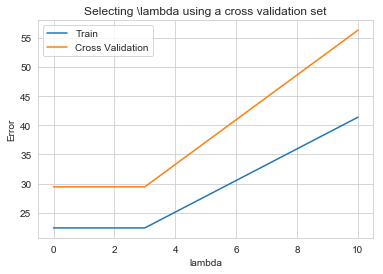

In [515]:
lambda_vec, error_train, error_val = validationCurve(X_bias,y,Xval_bias,yval)
plt.plot(lambda_vec, error_train, lambda_vec, error_val);
plt.title('Selecting \lambda using a cross validation set')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()